In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("winequality.csv")

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
def Outlier(data, col):
#Calculating the Inter Quantile Range    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    print("Inter Quantile Range: ", IQR)
    
#Output of the feature values boolean form with true representing an outlier
#and false representing no outlier
    outliers =  data[col] < (Q1 - (1.5*IQR)) 
    outliers_ = data[col] > (Q3 + (1.5*IQR))
    print (outliers|outliers_, "\nN/B: False=Absence of outlier, True=presence of outlier")
    
#Graphical presentation of the feature before treatment to remove outliers
    plt.boxplot(data[col])
    plt.show()
    print("The boxplot above shows the untreated feature with outliers")
    
#Skew value of the feature 
    skewed_features = data[col].skew()
    print("Skew value before treatment: {}".format(skewed_features))
    
#Flooring and capping method of removing outliers
    f = data[col].quantile(0.10)
    print("Flooring value: ", f)
          
    c = data[col].quantile(0.90)
    print("Capping value: ", c)
    
#Treating the given feature using flooring and capping values above
    data[col] = np.where(data[col]<f, f, data[col])
    data[col] = np.where(data[col]>c, c, data[col])
    print("Current skew value: ", data[col].skew())
   
    return plt.boxplot(data[col])

Inter Quantile Range:  0.7000000000000002
0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: residual sugar, Length: 1599, dtype: bool 
N/B: False=Absence of outlier, True=presence of outlier


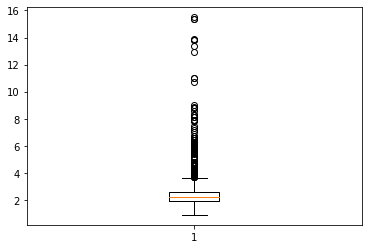

The boxplot above shows the untreated feature with outliers
Skew value before treatment: 4.54065542590319
Flooring value:  1.6999999999999997
Capping value:  3.6
Current skew value:  1.0041169119074087


{'whiskers': [<matplotlib.lines.Line2D at 0x1af25daa8c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1af25dae6c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af25da2fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1af25daef08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af25db3c48>],
 'means': []}

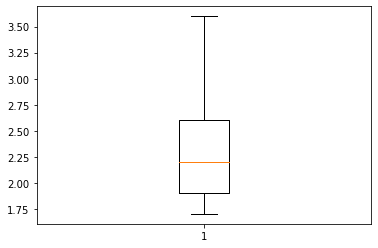

In [4]:
Outlier(data, "residual sugar")